In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *

In [3]:
os.makedirs('../data/models', exist_ok=True)
os.makedirs('../data/cache/tmp', exist_ok=True)

In [4]:
PATH = '../data/'

In [5]:
!ls {PATH}

cache
export.pkl
models
test
tmp
train
validation


### Metric: F2 Score for Multiple-Classification Problem
### Model: Resnet34

In [6]:
from coral import f2

metrics=[f2]
f_model = resnet34

In [7]:
label_csv = f'../data_splits/train_v3.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [8]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train', label_csv, tfms=tfms,
                    suffix='.jpeg', val_idxs=val_idxs, test_name=None)

In [16]:
# train_image_names = pd.read_csv(f'../data_splits/train.csv', index_col=0).index
# train_image_names = [i + '.tif' for i in train_image_names]
# train_image_names[:100]

In [17]:
# test_image_names = pd.read_csv(f'../data_splits/test.csv', index_col=0).index
# test_image_names = [i + '.tif' for i in test_image_names]
# test_image_names

In [18]:
# import os

# for i in test_image_names:
#     os.rename(os.path.join('../data/train/', i), os.path.join('../data/test/', i))

In [9]:
data = get_data(256)
x,y = next(iter(data.val_dl))

In [20]:
n, val_idxs

(7094, array([7057, 5724, 2887, ..., 1880, 2087,  181]))

In [45]:
len(val_idxs) / n

0.19988722864392444

In [21]:
y

tensor([[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]], device='cuda:0')

In [22]:
list(zip(data.classes, y[0]))

[('100', tensor(0., device='cuda:0')),
 ('102', tensor(0., device='cuda:0')),
 ('115', tensor(0., device='cuda:0')),
 ('118', tensor(0., device='cuda:0')),
 ('119', tensor(0., device='cuda:0')),
 ('12', tensor(0., device='cuda:0')),
 ('120', tensor(0., device='cuda:0')),
 ('123', tensor(0., device='cuda:0')),
 ('124', tensor(0., device='cuda:0')),
 ('125', tensor(0., device='cuda:0')),
 ('126', tensor(0., device='cuda:0')),
 ('127', tensor(0., device='cuda:0')),
 ('128', tensor(0., device='cuda:0')),
 ('129', tensor(0., device='cuda:0')),
 ('13', tensor(0., device='cuda:0')),
 ('131', tensor(0., device='cuda:0')),
 ('133', tensor(0., device='cuda:0')),
 ('134', tensor(0., device='cuda:0')),
 ('136', tensor(0., device='cuda:0')),
 ('137', tensor(0., device='cuda:0')),
 ('139', tensor(0., device='cuda:0')),
 ('14', tensor(0., device='cuda:0')),
 ('141', tensor(0., device='cuda:0')),
 ('143', tensor(0., device='cuda:0')),
 ('144', tensor(0., device='cuda:0')),
 ('145', tensor(0., device='

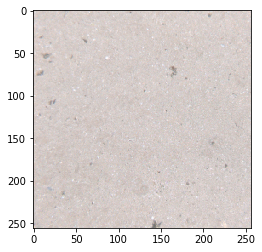

In [23]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1);

In [30]:
sz=64
data = get_data(sz)
# data = data.resize(int(sz*1.3) )
# data = data.resize(int(sz*1.3), 'tmp')
# data = data.resize(int(sz*1.3), 'tmp')

epoch      trn_loss   val_loss   f2                                                                                                                          
    0      0.58772    0.166045   0.558273  



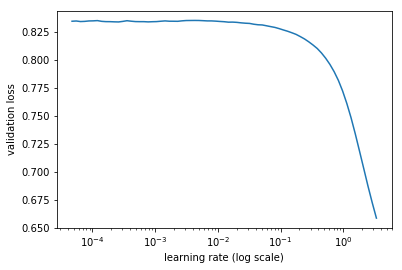

In [31]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)
lrf=learn.lr_find()
learn.sched.plot()

epoch      trn_loss   val_loss   f2                                                                                                                          
    0      0.182059   0.139445   0.525216  



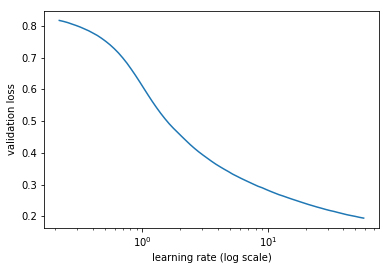

In [33]:
lrf=learn.lr_find(1e-01, 1000)
learn.sched.plot()

In [34]:
lr = 10
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                                                                                                                          
    0      0.186604   0.114686   0.657791  
    1      0.084699   0.05407    0.715031                                                                                                                    
    2      0.060399   0.052422   0.720616                                                                                                                    
    3      0.057345   0.051733   0.724742                                                                                                                    
    4      0.054617   0.050324   0.734474                                                                                                                    
    5      0.053018   0.04944    0.737086                                                                                                                    
    6   

[0.04903528953367799, 0.7427748163004463]

In [35]:
lrs = np.array([lr/9,lr/3,lr])
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                                                                                                                          
    0      0.060311   0.053254   0.711925  
    1      0.05625    0.051336   0.72094                                                                                                                     
    2      0.050393   0.04606    0.757591                                                                                                                    
    3      0.053184   0.055216   0.695117                                                                                                                    
    4      0.049455   0.045262   0.761008                                                                                                                    
    5      0.046313   0.042611   0.775916                                                                                                                    
    6   

[0.04223988658639541, 0.7806111342616715]

In [36]:
learn.save(f'{sz}')

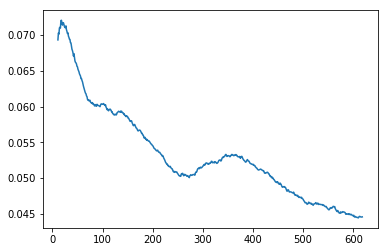

In [37]:
learn.sched.plot_loss()

In [38]:
sz=128
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                                                                                                                          
    0      0.044699   0.042775   0.77355   
    1      0.045133   0.043181   0.773759                                                                                                                    
    2      0.044168   0.042419   0.77531                                                                                                                     
    3      0.045016   0.043721   0.769975                                                                                                                    
    4      0.044145   0.042964   0.769975                                                                                                                    
    5      0.043153   0.042066   0.779451                                                                                                                    
    6   

[0.04179661438835861, 0.7792974573643475]

In [39]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

epoch      trn_loss   val_loss   f2                                                                                                                          
    0      0.04502    0.041856   0.780839  
    1      0.045079   0.043339   0.770625                                                                                                                    
    2      0.0419     0.040236   0.787395                                                                                                                    
    3      0.044685   0.04472    0.762956                                                                                                                    
    4      0.043814   0.042647   0.777093                                                                                                                    
    5      0.041299   0.039524   0.793678                                                                                                                    
    6   

In [40]:
learn.load(f'{sz}')
sz=256
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                                                                                                                          
    0      0.040764   0.039018   0.796887  
    1      0.041124   0.039337   0.795343                                                                                                                    
    2      0.039534   0.038499   0.798351                                                                                                                    
    3      0.04083    0.039605   0.793358                                                                                                                    
    4      0.040311   0.039011   0.795356                                                                                                                    
    5      0.039359   0.038398   0.798442                                                                                                                    
    6   

[0.03820034149608592, 0.8000199053642071]

In [41]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

epoch      trn_loss   val_loss   f2                                                                                                                          
    0      0.041226   0.038395   0.799015  
    1      0.041646   0.040325   0.787828                                                                                                                    
    2      0.039766   0.037759   0.805077                                                                                                                    
    3      0.041212   0.040709   0.792005                                                                                                                    
    4      0.04021    0.039337   0.795221                                                                                                                    
    5      0.03867    0.03739    0.806759                                                                                                                    
    6   

In [42]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [43]:
f2(preds,y)

0.807534209049824